In [1]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

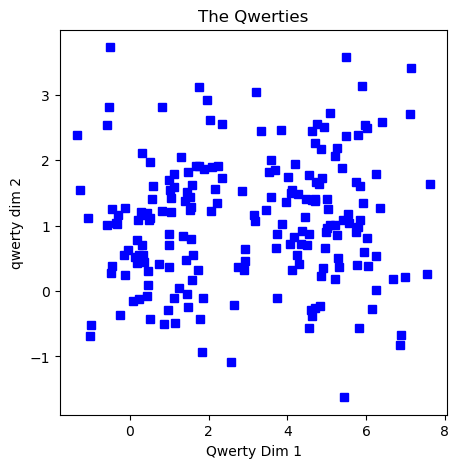

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])
Final Accuracy: 50.0


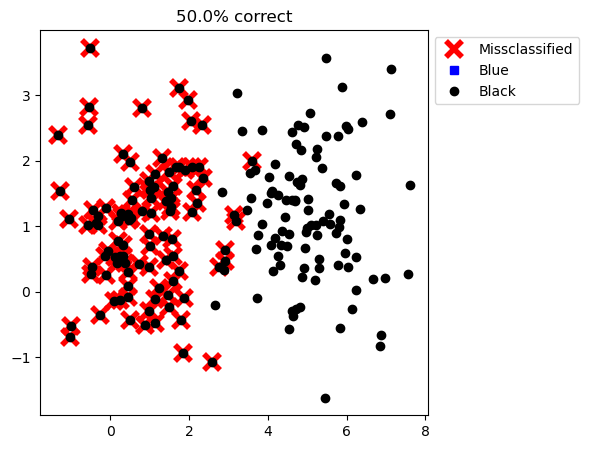

In [2]:

nPerClust = 100
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'bs')
plt.title('The Qwerties')
plt.xlabel('Qwerty Dim 1')
plt.ylabel('qwerty dim 2')
plt.show()


# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))


class theclass4ANN(nn.Module):
    def __init__(self):
        super().__init__()

        # Input Layer
        self.input = nn.Linear(2,1)

        # output layer
        self.output = nn.Linear(1,1)
    
    # Forward Pass
    def forward(self, x):

        # pass through the input layer
        x = self.input(x)

        # apply relu
        x = F.relu( x )

        # output layer

        x = self.output(x)
        x = torch.sigmoid(x)

        return x

# create an instance of the class
ANNclassify = theclass4ANN()

lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)

numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    yhat = ANNclassify(data)
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

predictions = ANNclassify(data)
predlabels = predictions > .5
missclassified = np.where(predlabels != labels)[0]
totalacc = 100-100*len(missclassified)/(2*nPerClust)

print(f'Final Accuracy: {totalacc}')

fig = plt.figure(figsize=(5,5))
plt.plot(data[missclassified, 0], data[missclassified, 1], 'rx', markersize=12, markeredgewidth=4)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'ko')

plt.legend(['Missclassified', 'Blue', 'Black'], bbox_to_anchor=(1, 1))
plt.title(f'{totalacc}% correct')
plt.show()
